# Project 2 - Film Analysis

By Jared Lilly \
Instructor Mark Barbour \
Flatiron School

## Business problem
I have been tasked with deducing three business suggestions for getting into original video content for our new movie studio. First we must define what makes a movie successful. For the purpose of this analysis we are leaning on IMDB's definition of a successful film, [How is the success of films and TV shows measured?](https://pro.imdb.com/content/article/entertainment-industry-resources/featured-articles/how-is-the-success-of-films-and-tv-shows-measured/GLFTC8ZLBBUSNTM3), which defines a successful film as a movie that makes twice as much as it's production budget to account for distribution costs. Some studies have increased the limit to 2.5x the production budget, however, for our purposes we'll define success as movies that made 2x their production budget and/or have a review rating of greater than or equal to 7 out of 10. 

## The Data
* Taken from datasets collected from IMDB, Box Office Mojo, and The Numbers
* Includes comprehensive information about production budget, domestic and international gross, directors, genres, etc. 

## Data Exploration
* Loaded in libraries and all datasets
* Basic data exploration to familiarize with data
* Combined datasets to check for correlations

In [59]:
#Loading in libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sqlite3
import zipfile
%matplotlib inline

In [60]:
# Loaded in Box Office Mojo dataset and saved as dataframe, from looking at the data want to use studio vs gross
# and how many movies each studio makes per year
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200,NaN,2018
3383,Edward II (2018 re-release),FM,4800,NaN,2018
3384,El Pacto,Sony,2500,NaN,2018
3385,The Swan,Synergetic,2400,NaN,2018


In [61]:
#unzipped and extracted imdb database using an imported zipfile library
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')
conn = sqlite3.connect('zippedData/im.db')

In [171]:
# Combined two tables into a dataframe using SQL, filtered out all ratings with under 100 number of votes
q = """
    SELECT  movie_basics.start_year, 
            movie_basics.genres, 
            movie_basics.primary_title,
            movie_basics.runtime_minutes,
            movie_basics.original_title,
            movie_ratings.averagerating, 
            movie_ratings.numvotes  
       FROM movie_basics
      JOIN movie_ratings USING(movie_id)
      WHERE movie_ratings.numvotes > 100 ;
    """
df_movie_rating = pd.read_sql(q, conn)
df_movie_rating

,start_year,genres,primary_title,runtime_minutes,original_title,averagerating,numvotes
0,2019,Documentary,Borderless,87,Borderless,9,559
1,2014,"Action,Adventure,Fantasy",The Legend of Hercules,99,The Legend of Hercules,4,50352
2,2010,"Comedy,Romance",Habana Eva,106,Habana Eva,6,326
3,2010,"Biography,Drama,Sport",The Hammer,108,Hamill,7,1613
4,2011,"Drama,Thriller",The Night Clerk,104,Avant l'aube,6,571
...,...,...,...,...,...,...,...
28643,2018,Drama,Sükut Evi,97,Sükut Evi,7,338
28644,2019,"Biography,Drama",PM Narendra Modi,136,PM Narendra Modi,4,4057
28645,2019,"Comedy,Romance",Ir visi ju vyrai,108,Ir visi ju vyrai,8,161
28646,2019,"Horror,Thriller",Musabbar,nan,Musabbar,6,317


In [144]:
q2 = """
    SELECT *
     FROM movie_akas
     LIMIT 10 ;
"""
pd.read_sql(q2, conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0


In [63]:
#Created new column with name to merge databases for further analysis. 
df_bom['primary_title'] = df_bom['title']
df_bom

,title,studio,domestic_gross,foreign_gross,year,primary_title
0,Toy Story 3,BV,415000000,652000000,2010,Toy Story 3
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,Alice in Wonderland (2010)
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,Harry Potter and the Deathly Hallows Part 1
3,Inception,WB,292600000,535700000,2010,Inception
4,Shrek Forever After,P/DW,238700000,513900000,2010,Shrek Forever After
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,NaN,2018,The Quake
3383,Edward II (2018 re-release),FM,4800,NaN,2018,Edward II (2018 re-release)
3384,El Pacto,Sony,2500,NaN,2018,El Pacto
3385,The Swan,Synergetic,2400,NaN,2018,The Swan


In [64]:
# Combined imdb and box office mojo dataframes using the primary_title column
df_combined = pd.merge(df_movie_rating, df_bom, on='primary_title')

In [65]:
# dropped duplicate columns year and title
df_combined.drop(columns=['start_year','title'], inplace=True)

In [66]:
df_combined

,genres,primary_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,"Action,Adventure,Fantasy",The Legend of Hercules,4,50352,LG/S,18800000,42400000,2014
1,Comedy,Baggage Claim,5,8296,FoxS,21600000,887000,2013
2,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,7,5494,Shout!,nan,3400000,2014
3,"Biography,Drama,Sport",Moneyball,8,326657,Sony,75600000,34600000,2011
4,"Drama,Fantasy,Romance",Hereafter,6,87288,WB,32700000,72500000,2010
...,...,...,...,...,...,...,...,...
2756,"Action,Adventure",The Dead Lands,6,4185,Magn.,5200,NaN,2015
2757,"Action,Drama,Thriller",The Wave,7,28167,Magn.,177000,NaN,2016
2758,Documentary,Hitchcock/Truffaut,7,4977,Cohen,260000,NaN,2015
2759,"Biography,Drama",Boy Erased,7,18768,Focus,6800000,5000000,2018


In [67]:
df_combined.groupby('genres').mean().sort_values(by='domestic_gross', ascending=False)

,averagerating,numvotes,domestic_gross,year
genres,,,,
"Adventure,Drama,Sport",6,62311,400700000,2013
"Action,Adventure,Sci-Fi",7,419617,234568085,2014
"Adventure,Drama,Sci-Fi",8,989725,208200000,2014
"Adventure,Fantasy",7,375770,192900000,2013
"Biography,Drama,Musical",8,199663,174300000,2017
...,...,...,...,...
"Action,Horror,Mystery",5,12218,2800,2012
"Fantasy,Thriller",6,5010,1400,2018
"Comedy,Thriller",2,647,800,2014


In [69]:
df_genres = df_combined['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
print(df_genres)
df_genres.value_counts()

0          Action
0       Adventure
0         Fantasy
1          Comedy
2       Adventure
          ...    
2759    Biography
2759        Drama
2760        Crime
2760        Drama
2760     Thriller
Length: 6573, dtype: object


Drama          1625
Comedy          891
Action          620
Romance         448
Adventure       433
Thriller        422
Crime           372
Biography       277
Horror          219
Mystery         198
Documentary     171
Fantasy         166
Animation       151
Sci-Fi          132
History         127
Family          100
Music            88
Sport            49
War              48
Western          20
Musical          15
News              1
dtype: int64

In [86]:
#There are 19 missing values for domestic gross and 1106 for foreign gross. There can be several possible reasons for the
#the missing data, a major one being that it is very possible for a film to only have a domestic release. 

print(df_combined.isna().value_counts('domestic_gross'))
print(df_combined.isna().value_counts('foreign_gross'))

domestic_gross
False    2742
True       19
dtype: int64
foreign_gross
False    1655
True     1106
dtype: int64


In [151]:
#Printed a dataframe with only the rows of missing domestic gross to get a better idea for how to treat the missing values

df_missing_domestic = df_combined[df_combined['domestic_gross'].isnull()]
df_missing_domestic

,genres,primary_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
2,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,7,5494,Shout!,nan,3400000,2014
319,"Action,History,Thriller",14 Blades,6,7100,RTWC,nan,3800000,2014
359,"Action,Crime,Drama",22 Bullets,7,30360,Cdgm.,nan,21300000,2013
495,"Drama,Music",Secret Superstar,8,16563,NaN,nan,122000000,2017
797,"Documentary,Music",Celine: Through the Eyes of the World,8,349,Sony,nan,119000,2010
1147,"Crime,Drama,Mystery",Solace,6,49417,LGP,nan,22400000,2016
1169,"Crime,Drama,Horror",The Tall Man,6,36331,Imag.,nan,5200000,2012
1170,Documentary,The Tall Man,7,129,Imag.,nan,5200000,2012
1530,"Action,Adventure,Drama",Dark Tide,4,7682,WHE,nan,432000,2012
1611,"Horror,Thriller",Jessabelle,5,20552,LGF,nan,7000000,2014


### Data Cleaning: Combined Dataframe
After reviewing the values there are two major takeaways.
* 1. These films do not appear to have had a domestic release
* 2. There are a couple duplicate values caused by merging the different dataframes.

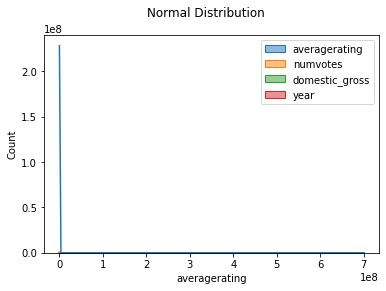

In [71]:
fig, ax = plt.subplots()
sns.histplot(df_combined, bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("averagerating")
fig.suptitle("Normal Distribution");

In [72]:
df_movie_rating.describe()

,start_year,averagerating,numvotes
count,28648,28648,28648
mean,2014,6,9041
std,3,1,48128
min,2010,1,101
25%,2012,5,203
50%,2014,6,469
75%,2016,7,1677
max,2019,10,1841066


In [ ]:
df_grouped_by_genre = df_movie_rating.groupby('genres')['averagerating'].mean()
df_grouped_by_genre.sort_values(ascending=False)

In [158]:
df_tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [92]:
#Datatype for budget and gross is object Dtype

df_tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [93]:
# Created new dataframe with converted columns to float

df_tn_converted = df_tn_budgets.copy()
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_convert:
    df_tn_converted[column] = df_tn_converted[column].replace('[\$]','',regex=True)
    df_tn_converted[column] = df_tn_converted[column].replace('[,]','',regex=True).astype('float')

#Suppressed scientific notation, and checked datatype again. Used float64 as df was too large for integer Dtype 
pd.options.display.float_format = '{:.0f}'.format
print(df_tn_converted.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [99]:
df_tn_converted['primary_title'] = df_tn_converted['movie']
df_tn_converted

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Red 11
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Following
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Return to the Land of Wonders
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,A Plague So Pleasant


In [112]:
df_tn_converted['financially_successful'] = df_tn_converted['worldwide_gross'] >= 2 * df_tn_converted['production_budget']
df_tn_converted['financially_successful'].value_counts()
# approximately 45% of the films in our dataset were financially successful. 

False    3161
True     2621
Name: financially_successful, dtype: int64

In [146]:
# merged all of the dataframes on primary_title columns and dropped unnecessary columns
# This results in a much smaller dataframe of 1253 values. 
df_inner = pd.merge(df_tn_converted, df_combined, on='primary_title', suffixes=('_df1', '_df2'))
df_inner.drop(columns= ['movie', 'domestic_gross_df2', 'foreign_gross'], inplace=True)
df_inner

,id,release_date,production_budget,domestic_gross_df1,worldwide_gross,primary_title,financially_successful,genres,averagerating,numvotes,studio,year
0,2,"May 20, 2011",410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,True,"Action,Adventure,Fantasy",7,447624,BV,2011
1,4,"May 1, 2015",330600000,459005868,1403013963,Avengers: Age of Ultron,True,"Action,Adventure,Sci-Fi",7,665594,BV,2015
2,7,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,True,"Action,Adventure,Sci-Fi",8,670926,BV,2018
3,9,"Nov 17, 2017",300000000,229024295,655945209,Justice League,True,"Action,Adventure,Fantasy",6,329135,WB,2017
4,10,"Nov 6, 2015",300000000,200074175,879620923,Spectre,True,"Action,Adventure,Thriller",7,352504,Sony,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,68,"Apr 27, 2012",135000,408015,429448,Sound of My Voice,True,"Drama,Mystery,Sci-Fi",7,19387,FoxS,2012
1249,73,"Jun 15, 2012",120000,1597486,3090593,Your Sister's Sister,True,"Comedy,Drama",7,24780,IFC,2012
1250,80,"Jul 10, 2015",100000,22764410,41656474,The Gallows,True,"Horror,Mystery,Thriller",4,17763,WB (NL),2015
1251,86,"Jul 7, 2017",100000,1594798,2769782,A Ghost Story,True,"Drama,Fantasy,Romance",7,46280,A24,2017


In [157]:
# retrying the merge but lowercasing all titles to avoid potential mismatching has no change in total amount of resulting 
df_tn_converted['primary_title'] = df_tn_converted['primary_title'].str.strip().str.lower()
df_combined['primary_title'] = df_combined['primary_title'].str.strip().str.lower()
df_lower_title = pd.merge(df_tn_converted, df_combined, on='primary_title', suffixes=('_df1', '_df2'))
df_lower_title

,id,release_date,movie,production_budget,domestic_gross_df1,worldwide_gross,primary_title,financially_successful,genres,averagerating,numvotes,studio,domestic_gross_df2,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,True,"Action,Adventure,Fantasy",7,447624,BV,241100000,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,avengers: age of ultron,True,"Action,Adventure,Sci-Fi",7,665594,BV,459000000,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,avengers: infinity war,True,"Action,Adventure,Sci-Fi",8,670926,BV,678800000,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,justice league,True,"Action,Adventure,Fantasy",6,329135,WB,229000000,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,spectre,True,"Action,Adventure,Thriller",7,352504,Sony,200100000,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,68,"Apr 27, 2012",Sound of My Voice,135000,408015,429448,sound of my voice,True,"Drama,Mystery,Sci-Fi",7,19387,FoxS,408000,NaN,2012
1259,73,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,your sister's sister,True,"Comedy,Drama",7,24780,IFC,1600000,NaN,2012
1260,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,the gallows,True,"Horror,Mystery,Thriller",4,17763,WB (NL),22800000,20200000,2015
1261,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,a ghost story,True,"Drama,Fantasy,Romance",7,46280,A24,1600000,NaN,2017


In [147]:
duplicates = df_inner.duplicated(subset=['primary_title','release_date'], keep='first')
df_inner = df_inner[~duplicates]
df_inner

,id,release_date,production_budget,domestic_gross_df1,worldwide_gross,primary_title,financially_successful,genres,averagerating,numvotes,studio,year
0,2,"May 20, 2011",410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,True,"Action,Adventure,Fantasy",7,447624,BV,2011
1,4,"May 1, 2015",330600000,459005868,1403013963,Avengers: Age of Ultron,True,"Action,Adventure,Sci-Fi",7,665594,BV,2015
2,7,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,True,"Action,Adventure,Sci-Fi",8,670926,BV,2018
3,9,"Nov 17, 2017",300000000,229024295,655945209,Justice League,True,"Action,Adventure,Fantasy",6,329135,WB,2017
4,10,"Nov 6, 2015",300000000,200074175,879620923,Spectre,True,"Action,Adventure,Thriller",7,352504,Sony,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,68,"Apr 27, 2012",135000,408015,429448,Sound of My Voice,True,"Drama,Mystery,Sci-Fi",7,19387,FoxS,2012
1249,73,"Jun 15, 2012",120000,1597486,3090593,Your Sister's Sister,True,"Comedy,Drama",7,24780,IFC,2012
1250,80,"Jul 10, 2015",100000,22764410,41656474,The Gallows,True,"Horror,Mystery,Thriller",4,17763,WB (NL),2015
1251,86,"Jul 7, 2017",100000,1594798,2769782,A Ghost Story,True,"Drama,Fantasy,Romance",7,46280,A24,2017


In [148]:
# Verify that no duplicates remain
duplicate_check = df_inner.groupby(['release_date', 'primary_title']).size()
duplicates_remaining = duplicate_check[duplicate_check > 1]

if duplicates_remaining.empty:
    print("No duplicates found. The cleaning process worked correctly.")
else:
    print("Duplicates found. The cleaning process did not work correctly.")
    print(duplicates_remaining)

No duplicates found. The cleaning process worked correctly.


In [150]:
print(df_inner['financially_successful'].value_counts())
print("In this dataframe of 1162 movies approximately 60% were financially successful")

True     692
False    470
Name: financially_successful, dtype: int64
In this dataframe of 1162 movies approximately 60% were financially successful


When we use an inner join on the data it brings us from a total of 5782 rows to only 1162 and increases the percentage of successful films to 60%. This subset doesn't seem to be representative of the overall data population so we will try some other methods. 

In [212]:
df_outer = pd.merge(df_tn_converted, df_movie_rating, on='primary_title', how='left', suffixes=('_df1', '_df2'))
df_outer

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,financially_successful,start_year,genres,runtime_minutes,original_title,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2010,"Crime,Drama",99,R,7,4226
1,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2017,"Drama,Romance",105,Ava,7,1517
2,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2011,"Horror,Sci-Fi",80,Aliens vs. Avatars,2,1544
3,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2017,Drama,102,Ava,7,192
4,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2011,Drama,86,Avé,7,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,79,"Apr 2, 1999",Following,6000,48482,240495,following,True,nan,NaN,nan,NaN,nan,nan
33276,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,return to the land of wonders,False,nan,NaN,nan,NaN,nan,nan
33277,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,a plague so pleasant,False,2015,"Drama,Horror,Sci-Fi",84,Plague,5,2256
33278,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,a plague so pleasant,False,2013,"Mystery,Romance,Thriller",109,Prague,6,310


In [214]:
# After removing duplicate values, we have the full dataset for df_tn_converted, however, only fills in NaN for 
# data not contained in df_movie_ratings. 
duplicates = df_outer.duplicated(subset=['release_date', 'primary_title'], keep='first')
df_outer = df_outer[~duplicates]
df_outer.value_counts('financially_successful')

financially_successful
False    3161
True     2621
dtype: int64

In [177]:
!pip install thefuzz

In [193]:
from thefuzz import process
from thefuzz import fuzz

In [195]:
# Rename the misspelled columns
df_movie_rating["primary_title"] = df_movie_rating["primary_title"].apply(
  lambda x: process.extractOne(x, df_tn_converted["primary_title"], scorer=fuzz.partial_ratio)[0]
)

# Attempt to join the two dataframe
data = pd.merge(df_tn_converted, df_movie_rating, on="primary_title", how="left")
print(data.head())

   id  release_date   movie  production_budget  domestic_gross  \
0   1  Dec 18, 2009  Avatar          425000000       760507625   
1   1  Dec 18, 2009  Avatar          425000000       760507625   
2   1  Dec 18, 2009  Avatar          425000000       760507625   
3   1  Dec 18, 2009  Avatar          425000000       760507625   
4   1  Dec 18, 2009  Avatar          425000000       760507625   

   worldwide_gross primary_title  financially_successful  start_year  \
0       2776345279        avatar                    True        2010   
1       2776345279        avatar                    True        2017   
2       2776345279        avatar                    True        2011   
3       2776345279        avatar                    True        2017   
4       2776345279        avatar                    True        2011   

          genres  runtime_minutes      original_title  averagerating  numvotes  
0    Crime,Drama               99                   R              7      4226  
1  Drama

In [197]:
duplicates = data.duplicated(subset=['release_date', 'primary_title'], keep='first')
data = data[~duplicates]
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,financially_successful,start_year,genres,runtime_minutes,original_title,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2010,"Crime,Drama",99,R,7,4226
8,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,True,2010,"Comedy,Romance",106,Habana Eva,6,326
4871,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,dark phoenix,False,2019,"Action,Adventure,Sci-Fi",113,Dark Phoenix,6,24451
4876,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,avengers: age of ultron,True,2013,"Biography,Documentary,Sport",124,The Armstrong Lie,7,6850
4909,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,star wars ep. viii: the last jedi,True,2015,"Adventure,Animation,Comedy",101,Pourquoi j'ai pas mangé mon père,5,941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33274,78,"Dec 31, 2018",Red 11,7000,0,0,red 11,False,nan,NaN,nan,NaN,nan,nan
33275,79,"Apr 2, 1999",Following,6000,48482,240495,following,True,nan,NaN,nan,NaN,nan,nan
33276,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,return to the land of wonders,False,nan,NaN,nan,NaN,nan,nan
33277,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,a plague so pleasant,False,2015,"Drama,Horror,Sci-Fi",84,Plague,5,2256


In [216]:
print(data['genres'].isna().sum())
print(df_outer['genres'].isna().sum())

3174
3174


In [215]:
df_outer

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,financially_successful,start_year,genres,runtime_minutes,original_title,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True,2010,"Crime,Drama",99,R,7,4226
8,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,True,2010,"Comedy,Romance",106,Habana Eva,6,326
4871,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,dark phoenix,False,2019,"Action,Adventure,Sci-Fi",113,Dark Phoenix,6,24451
4876,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,avengers: age of ultron,True,2013,"Biography,Documentary,Sport",124,The Armstrong Lie,7,6850
4909,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,star wars ep. viii: the last jedi,True,2015,"Adventure,Animation,Comedy",101,Pourquoi j'ai pas mangé mon père,5,941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33274,78,"Dec 31, 2018",Red 11,7000,0,0,red 11,False,nan,NaN,nan,NaN,nan,nan
33275,79,"Apr 2, 1999",Following,6000,48482,240495,following,True,nan,NaN,nan,NaN,nan,nan
33276,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,return to the land of wonders,False,nan,NaN,nan,NaN,nan,nan
33277,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,a plague so pleasant,False,2015,"Drama,Horror,Sci-Fi",84,Plague,5,2256


In [175]:
df_combined

,genres,primary_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,"Action,Adventure,Fantasy",the legend of hercules,4,50352,LG/S,18800000,42400000,2014
1,Comedy,baggage claim,5,8296,FoxS,21600000,887000,2013
2,"Adventure,Animation,Drama",jack and the cuckoo-clock heart,7,5494,Shout!,nan,3400000,2014
3,"Biography,Drama,Sport",moneyball,8,326657,Sony,75600000,34600000,2011
4,"Drama,Fantasy,Romance",hereafter,6,87288,WB,32700000,72500000,2010
...,...,...,...,...,...,...,...,...
2756,"Action,Adventure",the dead lands,6,4185,Magn.,5200,NaN,2015
2757,"Action,Drama,Thriller",the wave,7,28167,Magn.,177000,NaN,2016
2758,Documentary,hitchcock/truffaut,7,4977,Cohen,260000,NaN,2015
2759,"Biography,Drama",boy erased,7,18768,Focus,6800000,5000000,2018
